In [1]:
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
input_shape = (28, 28, 1)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical (Y_test, num_classes = 10)

for i in range(X_train.shape[0]):
    X_train[i] = (X_train[i]-X_train[i].mean())/X_train[i].std()
    
for i in range(X_test.shape[0]):
    X_test[i] = (X_test[i]-X_test[i].mean())/X_test[i].std()


In [3]:
# --- hiperparámetros ---
F = 4   #-- cantidad de filtros o de mapas de características --
K = 3   #-- tamaño del kernel o máscara ---
S = 1   #-- stride ---
P = 1   #-- padding ---   
FUN = "relu"   #-- función de activación de la capa de convolucion --
PS = 2  #-- tamaño para la ventana de pooling  --

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(F, kernel_size=K, strides=(S,S), activation=FUN))
model.add(MaxPooling2D(pool_size=(PS,PS)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 4)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 676)               0         
                                                                 
 dense (Dense)               (None, 10)                6770      
                                                                 
Total params: 6,810
Trainable params: 6,810
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile('SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [5]:
LOTES = 128
EPOCAS  = 4000

# entrena el modelo y guarda la historia del progreso    
es = EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.001)
H = model.fit(x = X_train, y = Y_train, batch_size = LOTES, validation_data = (X_test, Y_test), epochs=EPOCAS, callbacks=[es])

# H = model.fit(x = X_train, y = Y_train, batch_size = LOTES, epochs = EPOCAS, validation_data = (X_test, Y_test))

print("Epocas = %d" % es.stopped_epoch)


Epoch 1/4000
469/469 [==============================] - 14s 28ms/step - loss: 0.7167 - accuracy: 0.7867 - val_loss: 0.3641 - val_accuracy: 0.8964
Epoch 2/4000
469/469 [==============================] - 12s 26ms/step - loss: 0.3526 - accuracy: 0.8977 - val_loss: 0.3128 - val_accuracy: 0.9124
Epoch 3/4000
469/469 [==============================] - 13s 27ms/step - loss: 0.3150 - accuracy: 0.9091 - val_loss: 0.2880 - val_accuracy: 0.9174
Epoch 4/4000
469/469 [==============================] - 11s 23ms/step - loss: 0.2917 - accuracy: 0.9167 - val_loss: 0.2694 - val_accuracy: 0.9222
Epoch 5/4000
469/469 [==============================] - 14s 30ms/step - loss: 0.2714 - accuracy: 0.9228 - val_loss: 0.2527 - val_accuracy: 0.9274
Epoch 6/4000
469/469 [==============================] - 12s 25ms/step - loss: 0.2541 - accuracy: 0.9274 - val_loss: 0.2372 - val_accuracy: 0.9336
Epoch 7/4000
469/469 [==============================] - 12s 25ms/step - loss: 0.2382 - accuracy: 0.9326 - val_loss: 0.2301 -

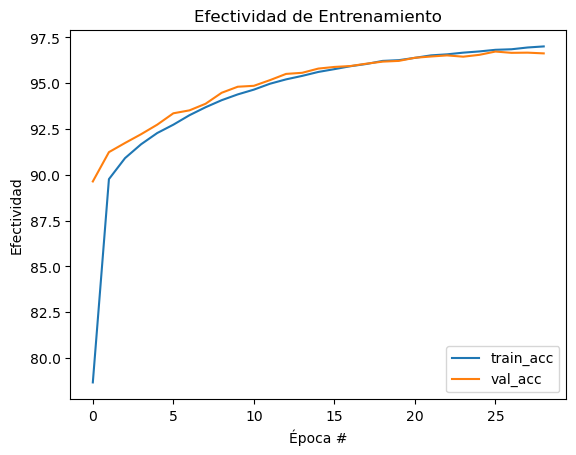

In [6]:
# dibuja accuracy del progreso del entrenamiento

# N = np.arange(0, EPOCAS)
accuracy = np.array(H.history["accuracy"])
val_accuracy = np.array(H.history["val_accuracy"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_acc")
plt.plot(N, 100*val_accuracy, label="val_acc")
plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("Efectividad")
plt.legend(loc="lower right")

In [7]:
# evalua el modelo con los datos de validacion
pred = model.evaluate(X_test, Y_test, batch_size = LOTES)

print("\nEfectividad del modelo con datos de validación: %6.2f%%" % (pred[1]*100))

79/79 [==============================] - 0s 3ms/step - loss: 0.1121 - accuracy: 0.9663

Efectividad del modelo con datos de validación:  96.63%


In [13]:
Y_pred = model.predict(X_test)
Y_pred_nro = np.argmax(Y_pred, axis=1)    # conversión a entero
Y_true = np.argmax(Y_test, axis=1)

report = metrics.classification_report(Y_true,Y_pred_nro)
print("Classification report - Training:\n%s" % report) 

cm = metrics.confusion_matrix(Y_true, Y_pred_nro)
print("Confusion matrix:\n%s" % cm) 


313/313 [==============================] - 0s 2ms/step
Classification report - Training:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.98      0.97      0.98       958
           7       0.95      0.96      0.95      1028
           8       0.96      0.95      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion matrix:
[[ 966    0    3    1    0    3    1    3    3    0]
 [   0 1124    1    3    0    0    3    1    2    1]
 [   5    5  988    5    6  